# **Classify the Emails into Spam or Not.**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [2]:
# Load the dataset
df = pd.read_csv('spam_or_not_spam.csv')

# Shape and first 5 rows
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (3000, 2)


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


# Understanding the Data

In [3]:
# Data types and info
print("Dataset Info:")
print(df.info())

# Null values
print("\nNull Values Count:")
print(df.isnull().sum())

# Unique value count
print("\nUnique Values Count:")
print(df.nunique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None

Null Values Count:
email    1
label    0
dtype: int64

Unique Values Count:
email    2872
label       2
dtype: int64


In [4]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.isnull().any()

email     True
label    False
dtype: bool

# Data Visualization

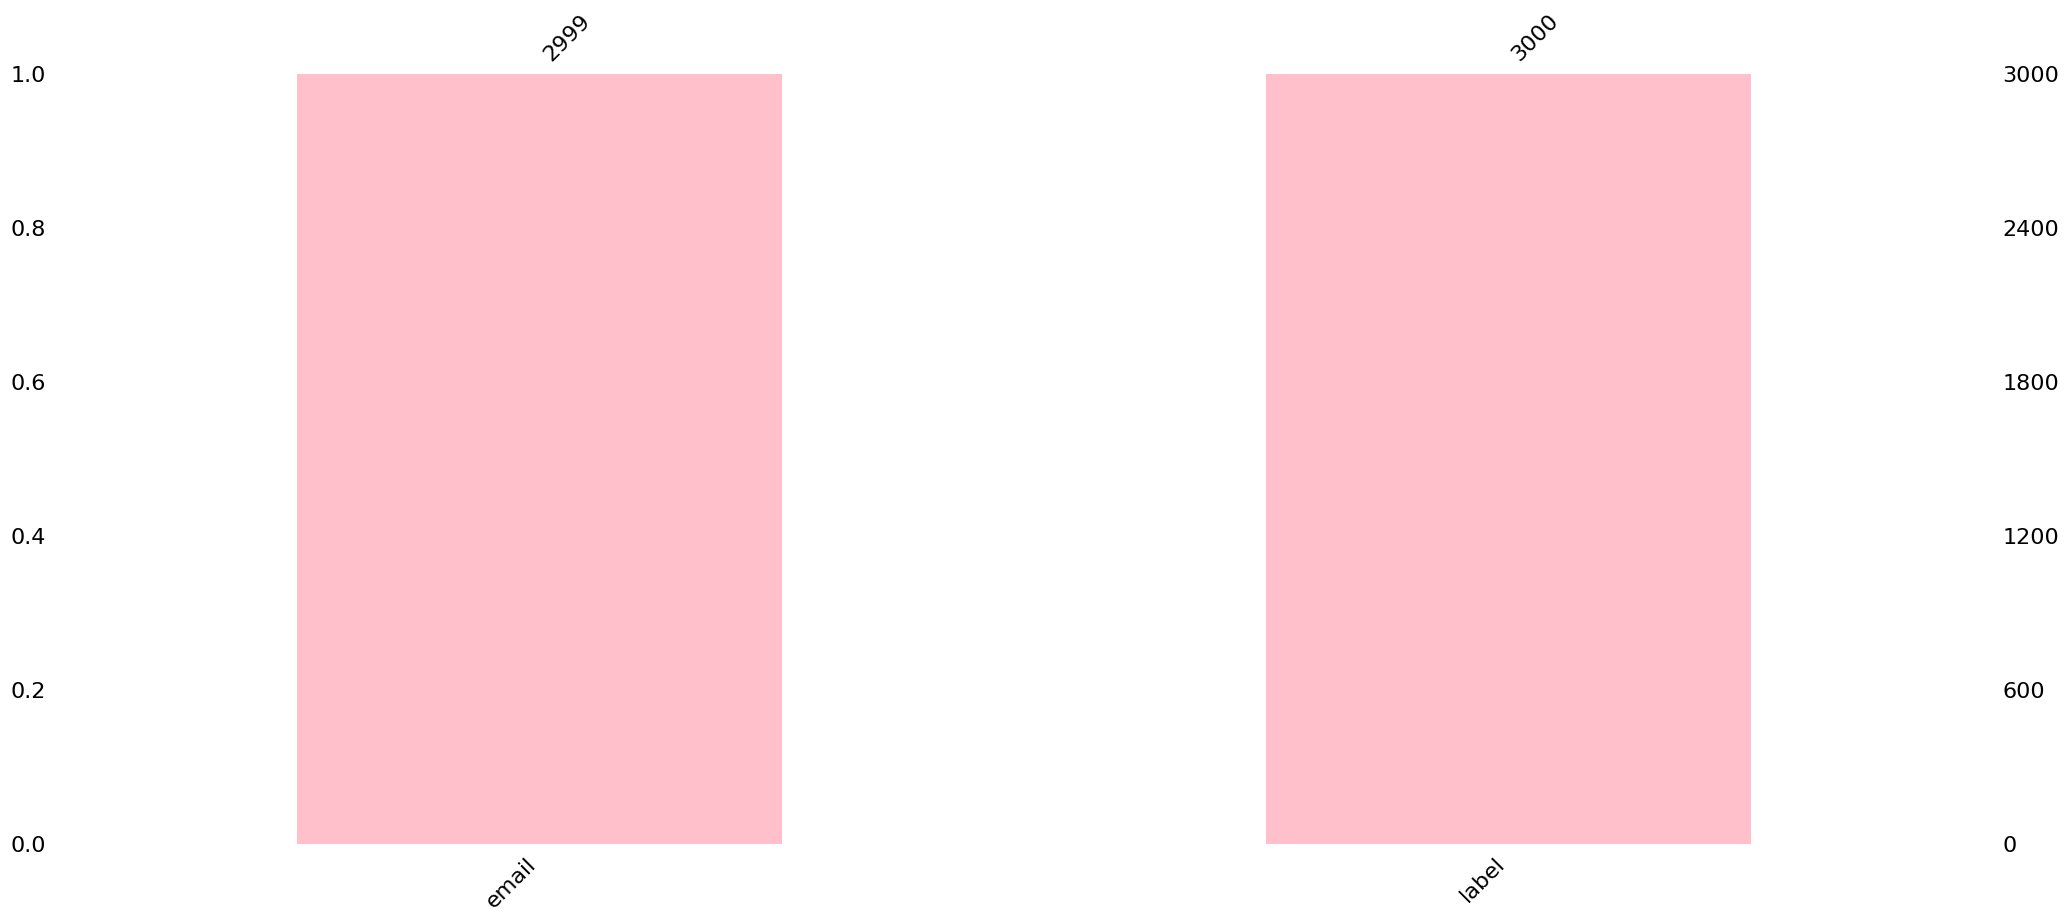

In [6]:
import missingno as no
# Visualize missing values
no.bar(df, color='pink')
plt.show()

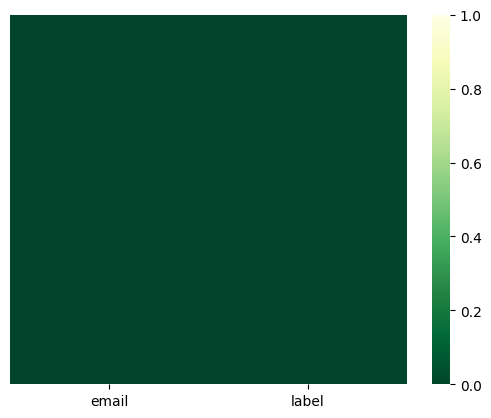

Shape after dropping missing values: (2999, 2)


In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='YlGn_r')
plt.show()

# Remove rows with missing values
df.dropna(inplace=True)

print("Shape after dropping missing values:", df.shape)

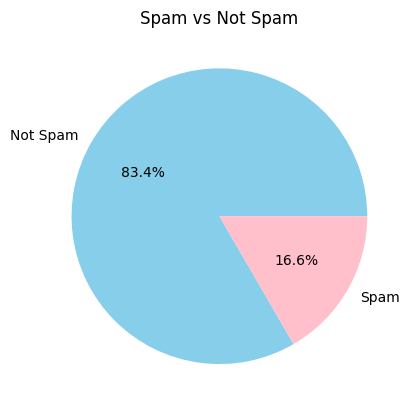

In [8]:
# Pie Chart for label distribution
df['label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'pink'],
    labels=['Not Spam', 'Spam']
)
plt.title("Spam vs Not Spam")
plt.ylabel("")
plt.show()

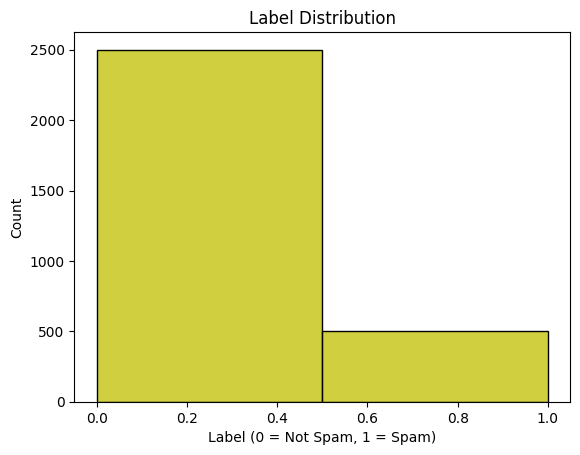

In [9]:
# Histogram for label distribution
sns.histplot(df['label'], color='y', bins=2)
plt.title("Label Distribution")
plt.xlabel("Label (0 = Not Spam, 1 = Spam)")
plt.show()

# Splitting the Data into Dependent and Indpendent variables

Feature Extraction (TF-IDF)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

In [11]:
# Independent variable (features)
X = tfidf.fit_transform(df['email'])

# Dependent variable (target)
y = df['label']

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (features): (2999, 34116)
Shape of y (labels): (2999,)


# Training and Testing the Data

In [12]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (2249, 34116)
Testing set size: (750, 34116)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Multiomial Naive Bayes Classifier

In [14]:
# Train the Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## Prediction

In [15]:
# Predictions
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

## Confusion Matrix

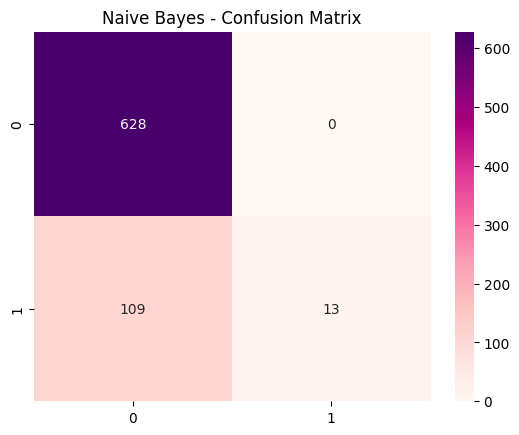

In [16]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdPu", fmt='g')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

## Accuracy

In [17]:
print("Train Accuracy:", accuracy_score(y_train, y_pred_train)*100)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test)*100)

Train Accuracy: 86.79413072476656
Test Accuracy: 85.46666666666667


# Decission Tree

In [18]:
# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Prediction

In [19]:
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

## Confusion Matrix

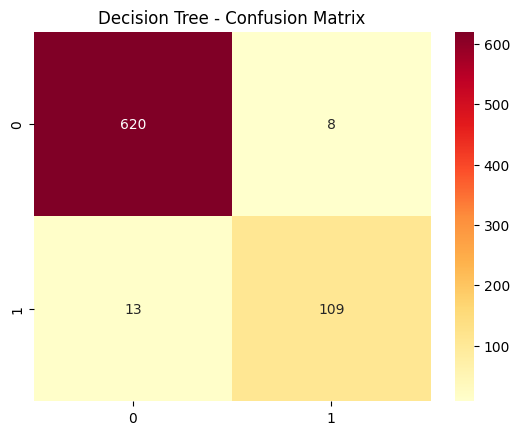

In [20]:
cm_dt = confusion_matrix(y_test, y_pred_test_dt)
sns.heatmap(pd.DataFrame(cm_dt), annot=True, cmap="YlOrRd", fmt='g')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

## Accuracy

In [21]:
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_dt)*100)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_dt)*100)

Train Accuracy: 100.0
Test Accuracy: 97.2


#Compare Models

In [22]:
# Accuracy comparison table
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Train Accuracy (%)': [
        accuracy_score(y_train, y_pred_train)*100,
        accuracy_score(y_train, y_pred_train_dt)*100
    ],
    'Test Accuracy (%)': [
        accuracy_score(y_test, y_pred_test)*100,
        accuracy_score(y_test, y_pred_test_dt)*100
    ]
})

print(results)


           Model  Train Accuracy (%)  Test Accuracy (%)
0    Naive Bayes           86.794131          85.466667
1  Decision Tree          100.000000          97.200000


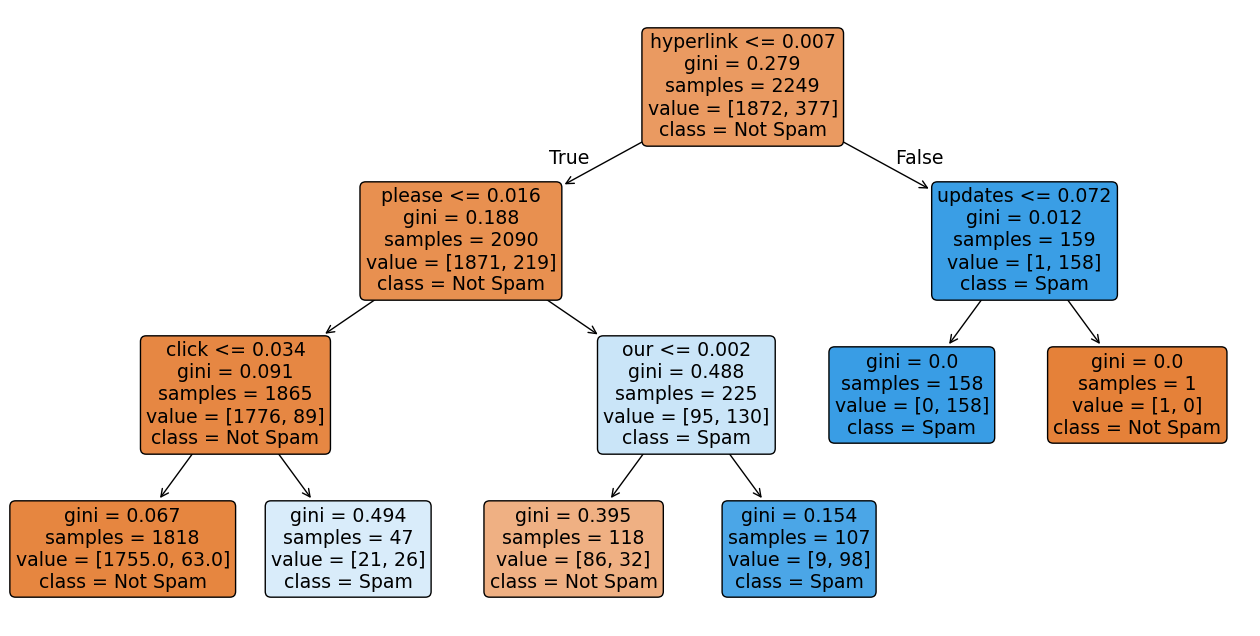

In [23]:
from sklearn import tree

# Limit depth to make the tree simpler & avoid overfitting
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=10)
clf_tree.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
tree.plot_tree(
    clf_tree,
    filled=True,
    feature_names=tfidf.get_feature_names_out(),
    class_names=['Not Spam', 'Spam'],
    rounded=True
)
plt.show()


In [26]:
import joblib

# Save the model
joblib.dump(dt, "models/decision_tree_spam.pkl")

# Save the TF-IDF vectorizer as well (needed for transforming text later)
joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
